In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# train 데이터 정보 보기

In [3]:
print('\n ### train 데이터 정보 ###  \n')
titanic_df.info()

# 총 891개 행
# age, carbin, embarked에 null값 포함
# 그 중, cabin은 null값이 대부분


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 데이터 전처리

## Null 칼럼들 처리

In [6]:
# null값 채우는 함수 : fillna()
# 1. Age칼럼의 Null값들은 평균값으로 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
# 2. Cabin(선실번호)는 Null값들 너무 많으니까, 새로운 값인 N으로 처리
titanic_df['Cabin'].fillna('N',inplace=True)
# 3. Embarked(중간 정착 항구)는 평균이나 그런걸 구할 수 없으니, 새로운 값인 N으로 처리
titanic_df['Embarked'].fillna('N',inplace=True)

#Null값 있는지 확인하기 : isnull()
print('데이터 세트 Null값 개수',titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수 0


## 주요 칼럼 EDA

### object 칼럼 타입 추출

In [10]:
titanic_df.dtypes[titanic_df.dtypes=='object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### sex, cabin, embarked 분포 확인

In [11]:
#value_counts()로 확인
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [13]:
# Cabin의 맨 앞글자만 따오기
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [14]:
# Cabin칼럼을 앞글자만 나타나게 하기(뒤에 숫자들은 의미없으니까)
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'])

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object


### sex와 survived 분포 확인

In [16]:
# groupby 사용
titanic_df.groupby(['Sex','Survived'])

In [17]:
#특정 칼럼에 대해서 count해보기
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

## 시각화

### 간단ver

In [19]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

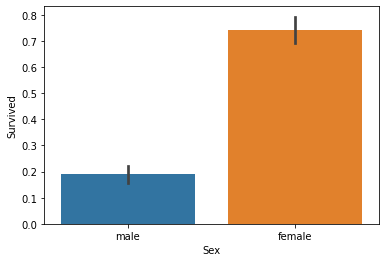

In [20]:
# 1. 성별별로 생존여부 시각화
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

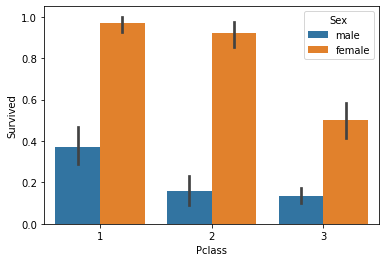

In [21]:
# 2. 선실등급별 성별별 생존여부
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

### 심화ver

In [22]:
# <입력 age에 따라 구분값을 반환하는 함수>
#DataFrame의 apply lambda식에 사용
def get_category(age):
    cat=''
    if age<=-1: 
        cat='Unknown'
    elif age<=5: 
        cat='Baby'
    elif age<=12:
        cat='Child'
    elif age<=18:
        cat='Teenager'
    elif age<=25:
        cat='Student'
    elif age<=35:
        cat='Young Adult'
    elif age<=60:
        cat='Adult'
    else:
        cat='Elderly'
    return cat

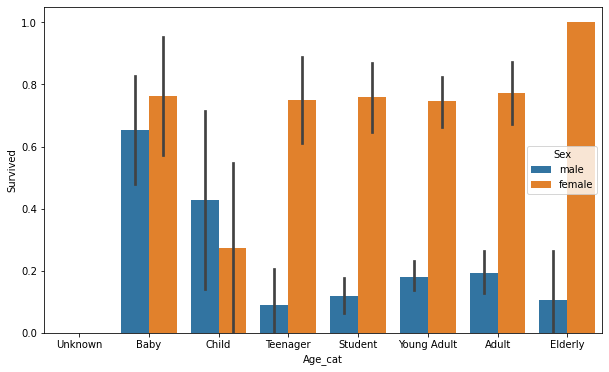

In [27]:
# 나이대별 성별별 생존여부
# x축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# 막대그래프 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)#order한 이유: 그냥 정렬되게 보이려고

# 원래꺼에 영향 안가게 새로 만든 열 삭제
titanic_df.drop('Age_cat',axis=1,inplace=True)

## 레이블 인코딩

In [29]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']#독립변수 3개(object로 됨)
    
    le=LabelEncoder()
    #독립변수들 1개씩 레이블 인코딩하기
    for feature in features:
        le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 전처리 한번에 함수 만들기

In [34]:
from sklearn.preprocessing import LabelEncoder

#<데이터 전처리 함수 만들기>
# 1. Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    return df

# 2. 머신러닝 알고리즘에 불필요한 칼럼(feature) 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 3. 레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

#<앞에서 만든 데이터 전처리 함수들 모두 호출>
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


# feature와 label 데이터셋 추출

In [35]:
# 원본 데이터 재로딩하고, feature데이터셋과 label 데이터셋 추출
titanic_df=pd.read_csv('./titanic_train.csv')
y_titanic_df=titanic_df['Survived']#종속변수값
X_titanic_df=titanic_df.drop('Survived',axis=1,inplace=False)#종속변수 빼고 반환

# 아까 만든 함수에 적용해서 데이터 전처리 한번에 하기
X_titanic_df=transform_features(X_titanic_df)

# 일반 분리 후 학습

## train, test split

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,
                                              test_size=0.2,random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


## 학습/예측/평가

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. 결정트리, Random Forest, 로지스틱 회귀 위한 객체생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression(solver='liblinear')#옛날버전 결과 나오게 하기 위해 solver설정

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
#예측값과 실제 결과값(y_test)간 비교하여 정확도 계산
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


# K-fold 후 학습

In [45]:
from sklearn.model_selection import KFold

#Stratified KFold 적용X
def exec_kfold(clf, folds=5):
    # 1. 교차검증 5번 하는 KFold 객체 생성
    kfold=KFold(n_splits=folds)
    # 2. 폴드 수만큼 예측결과 저장 위한 리스트 객체생성
    scores=[] #맨 마지막에 평균정확도 계산 위함
    
    # 3. KFold 교차검증 수행
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)): #enumerate:자동으로 인덱스 생성
        # X_titanic_df 데이터에서 교차검증별로 학습, 검증 데이터 가리키는 index생성
        # 자동생성한 index를 실제 값에 넣어서, 그 값을 X_train,X_test,y_train,y_test에 넣기
        X_train, X_test=X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train, y_test=y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        
        # Classifier 학습/예측/정확도 계산
        clf.fit(X_train,y_train)
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test,predictions)
        scores.append(accuracy) #리스트에 값 추가
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))
    
    # 4. 5개 fold에서의 평균 정확도 계산
    mean_score=np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

# 함수 실행 : exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


# cross_val_score 후 학습

In [49]:
from sklearn.model_selection import cross_val_score

#Stratified KFold 적용ㅇ
# 1. 학습/예측/정확도 한번에
#scores=각 교차검증 세트별 정확도
scores=cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5) #5번 교차검증

# 2. 평균 정확도 계산
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


# GridSearchCV 후 학습

In [50]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
           'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

# 1. 객체 생성
grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
# 2. 학습
grid_dclf.fit(X_train,y_train)
# 3. 최적 하이퍼 파라미터, 최고 정확도 측정
print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼파라미터로 학습된 estimator로 예측, 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
